# Fourier transform II
## Phys 481  Winter 2017  Week 10




   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Fourier transform

If the Fourier transform is defined as

 $$ F(\omega) = \int_{-\infty}^{+\infty} dt \; e^{-i \omega t} \; f(t) $$
 
and the inverse Fourier transform is defined as
 
 $$ f(t) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} d\omega \; e^{+i \omega t} \; F(\omega) $$ 
 
then we can take the inverse of a forward transform

 $$ f(t) = \frac{1}{2\pi}  \int_{-\infty}^{+\infty} d\omega \; e^{+i \omega t} \int_{-\infty}^{+\infty} dt' \; e^{-i \omega t'} \; f(t') $$ 

and rearrange 

 $$ f(t) =  \int_{-\infty}^{+\infty} dt' \; f(t') \; \frac{1}{2\pi} \int_{-\infty}^{+\infty} d\omega \; e^{+i \omega t}\; e^{-i \omega t'}  $$
 
and rearrange 
 
 $$ f(t) =  \int_{-\infty}^{+\infty} dt' \; f(t') \; \frac{1}{2\pi}\int_{-\infty}^{+\infty} d\omega \; e^{i \omega (t - t')}  $$ 
 
to get the following result in terms of the Dirac delta function
 
  $$ f(t) =  \int_{-\infty}^{+\infty} dt' \; f(t') \; \delta(t'-t) $$

## Dirac delta function

The Dirac delta function has the following property

 $$ \int_{-\infty}^{+\infty} dx \; f(x) \; \delta(x-x') = f(x') $$

so from the definition of Fourier transforms we can also say

 $$ \delta(t-t') = \frac{1}{2\pi} \int_{-\infty}^{+\infty} d\omega \; e^{i \omega (t - t')}  $$ 
 
 

## Examples

### Real delta function

 $$ f(t) = \delta(t - t_0) $$
 
 $$ F(\omega) = \int_{-\infty}^{+\infty} dt \; e^{-i \omega t} \; \delta(t - t_0) $$
 
 $$ F(\omega) =  e^{i \omega t_0} $$ 

/home/bjackel/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


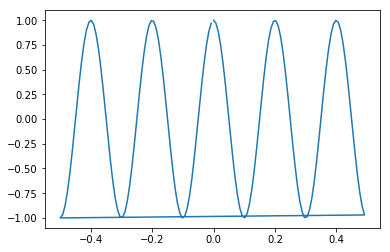

In [2]:
time = np.linspace(0, 1.0, 129)[0:-1]   # time scale

tfunc = np.zeros( len(time) )   # test function
tfunc[5] = 1.0               # only a single frequency is non-zero

ffunc = np.fft.fft(tfunc)   # Fourier transform
freq = np.fft.fftfreq(len(tfunc))  # frequency scale
plt.plot(freq, ffunc)

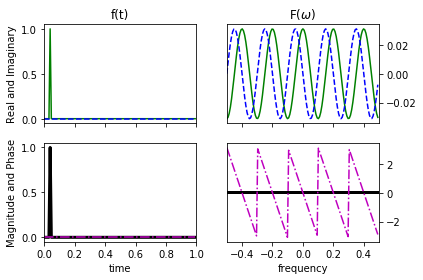

In [3]:
from fft_code import plot_fourier4   # top secret code
plot_fourier4(tfunc, time)

### Task: Write a python function called "plot_fourier4(f,t)" to generate sets of 2x2 figures exactly as shown.

### Complex harmonic

 $$ f(t) = e^{i \omega_0 t} = \cos(\omega_0 t) + i \sin(\omega_0 t)$$
 
 $$ F(\omega) = \int_{-\infty}^{+\infty} dt \; e^{-i \omega t} \; e^{i \omega_0 t} $$
 
 $$ F(\omega) = \int_{-\infty}^{+\infty} dt \; e^{i (\omega_0 - \omega) t} $$ 
 
 $$ F(\omega) = \delta(\omega_0 - \omega) $$  

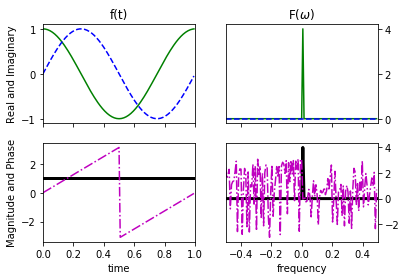

In [4]:
from fft_code import plot_fourier4    # top secret code

time = np.linspace(0, 1.0, 129)[0:-1]  
omega = 2*np.pi * 1.0
phi = 0.0
tfunc = np.exp(0+1j * omega*time + phi)  # $e^{i\omega t + \phi}$

plot_fourier4(tfunc, time)

In [5]:
# numerical precision makes the phase look noisy
#
ffunc = np.fft.fft(tfunc)
freq = np.fft.fftfreq(len(tfunc))
print(ffunc)

[ -4.82703475e-15 +6.49820617e-16j   1.28000000e+02 -1.18691848e-13j
   4.74520722e-15 +3.64521478e-17j   3.58944134e-14 +1.76223867e-15j
   1.98814400e-15 -7.53046752e-16j   1.81657605e-14 +6.18411030e-16j
   1.43113702e-15 +1.25865047e-15j   1.32459412e-14 +1.83840726e-15j
   8.40347080e-17 -5.71172980e-16j   1.19289165e-14 +2.03964288e-15j
   2.26192513e-16 +1.24189090e-15j   8.04760309e-15 +1.30473641e-15j
   7.78995176e-16 +1.45621115e-15j   3.45821096e-15 +1.16688546e-15j
  -6.21079777e-16 -1.20642626e-15j   4.99145753e-15 +5.08222514e-16j
   4.79549948e-16 +3.54681324e-16j   4.51699514e-15 +2.15580828e-15j
   1.39893483e-15 +8.33820953e-16j   3.26558552e-15 +3.88252933e-15j
   1.34064077e-15 +4.23138149e-16j   4.28749840e-15 +3.17863566e-15j
   9.13627410e-18 +1.40562144e-15j   3.52164338e-15 +2.64702820e-15j
  -8.61774660e-16 +4.87973801e-15j  -4.30983194e-15 +2.45036469e-15j
  -1.07018510e-15 -4.04617972e-15j   3.14027296e-15 -2.14330800e-17j
  -8.00398616e-16 +1.26704452e-15j

### Task: Calculate the Fourier transform $F(\omega)$ for each of the following functions

Constant
 $$ f(t) = C $$

Single spike at the origin
 $$ f(t) = \delta(t) $$

Two spikes at $\pm t_0$
 $$ f(t) = \delta(t-t_0) + \delta(t+t_0)  $$

Cosine
 $$ f(t) = \cos(\omega_0 t) $$

Sine
 $$ f(t) = \sin(\omega_0 t) $$
 
Tophat
 $$ f(t) = 1 \qquad\mathrm{if}\quad -t_0 \le t \le +t_0 \qquad \mathrm{else} \quad 0$$ 

###   Task: change the time scale from

this set of 128 points

     time = np.linspace(0, 1.0, 129)[0:-1]

to this very similar set of 128 points

     ttime = np.linspace(0, 1.0, 128)
  
then generate a new complex harmonic and see how the FFT changes.  Discuss.